# Turtle Games - *Utilising Custmer Trends to Improve Sales*
## Scenario
Turtle Games is a game manufacturer and retailer with a global customer base. The company manufactures and sells its own products, along with sourcing and selling products manufactured by other companies. Its product range includes books, board games, video games, and toys. The company collects data from sales as well as customer reviews. Turtle Games has a business objective of improving overall sales performance by utilising customer trends. 

To improve overall sales performance, Turtle Games has come up with an initial set of questions, which they would like help exploring.

1. How customers accumulate loyalty points?
2. How groups within the customer base can be used to target specific market segments?
3. How social data (e.g. customer reviews) can be used to inform marketing campaigns?
4. The impact that each product has on sales?
5. How reliable the data is (e.g. normal distribution, skewness, or kurtosis)?
6. What the relationship(s) is/are (if any) between North American, European, and global sales?
 

------

## 1. How Do Customers Accumulate Loyalty Points? 
Investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

### 1.1 Workstation Setup

In [2]:
# Import Necessary Packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [7]:
# Load the 'turtle_reviews' database and create the DataFrame. 
reviews = pd.read_csv('turtle_reviews.csv')

### 1.2 Explore the Data

In [8]:
# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
# Check for missing Values.
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [11]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [10]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


### 1.3 Clean-up the DataFrame and Export Clean csv

In [18]:
# Drop unnecessary columns 'language' and 'platform'.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

In [22]:
# Change column headings:
# remunereation (k£) to salary, 
# spending_score (1-100) to spending_score).
reviews.rename(columns={'remuneration (k£)': 'salary', 
                        'spending_score (1-100)': 'spending_score'}, inplace=True)

In [24]:
# Sense-check the DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   salary          2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [26]:
# Export the clean csv 'reviews' file. 
reviews.to_csv('reviews_clean.csv') 

### 1.4 Linear Regression
Evaluate possible linear relationships between:
* Loyalty Points and Age
* Loyalty Points and Salary
* Loyalty Points and Spending Score

#### 1.41 Loyalty Points and Age

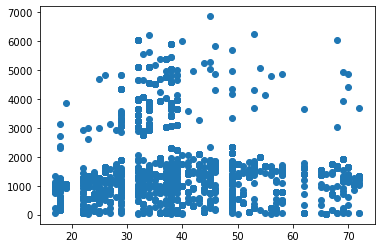

In [29]:
# Define the variables: 
# Dependent Variable
y = reviews['loyalty_points']

# Independent Variable
x = reviews['age']

# Quick check for linearity.
plt.scatter(x, y)

In [31]:
# OLS Model and Summary
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 05 Aug 2022   Prob (F-statistic):             0.0577
Time:                        07:30:12   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64


In [33]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64


In [34]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [39]:
# Set the the x coefficient to ‘-4.012805’ 
# and the constant to ’1736.517739’ to generate the regression table.
y_pred = -4.012805 * reviews['age'] + 1736.517739

y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

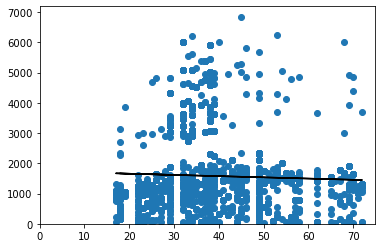

In [40]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

#### 1.42 Loyalty Points and Salary

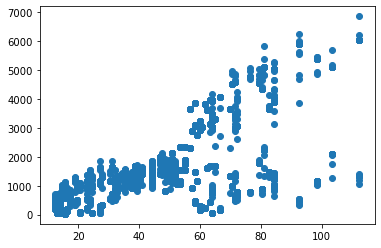

In [49]:
# Define the variables: 
# Dependent Variable
y = reviews['loyalty_points']

# Independent Variable
x = reviews['salary']

# Quick check for linearity.
plt.scatter(x, y)

In [50]:
# OLS Model and Summary
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        07:52:52   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64


In [52]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64


In [53]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [54]:
# Set the the x coefficient to ‘34.187825’ 
# and the constant to ’-65.686513’ to generate the regression table.
y_pred = 34.187825 * reviews['salary'] - 65.686513

y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: salary, Length: 2000, dtype: float64

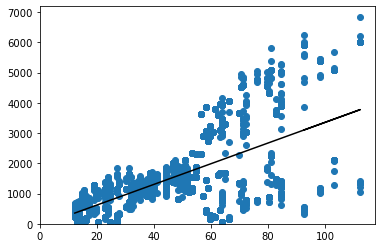

In [55]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

#### 1.43 Loyalty Points and Spending Score

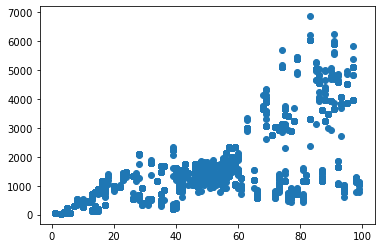

In [56]:
# Define the variables: 
# Dependent Variable
y = reviews['loyalty_points']

# Independent Variable
x = reviews['spending_score']

# Quick check for linearity.
plt.scatter(x, y)

In [57]:
# OLS Model and Summary
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        07:57:21   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64


In [59]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64


In [60]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [61]:
# Set the the x coefficient to ‘33.061693’ 
# and the constant to ’-75.052663’ to generate the regression table.
y_pred = 33.061693 * reviews['spending_score'] - 75.052663

y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

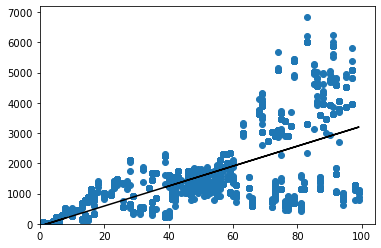

In [62]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 1.5 Observations and Insights

Based on the data analysis and the linear regression models built to assess relationships between loyalty points and age/salary/spending score, the following was determined. 

1. Age has little to no bearing on loyalty points and should not be used as a predictor. This can be clearly noted by a simple visual inspection of the scatterplot. Further, the coefficient of determination or r-sqrt 0.002, confirming no linear relationship exists between age and loyatly points. 
2. Both salary and spending score can be used to predict loyalty points. A linear relationship can be seen by visually inspecting both scatterplots. Further, the calcuated coefficient of determination for each is as follows: 
  * Loyalty Points and Salary = r-sqrd is 0.380
  * Loyalty Points and Spending Score = r-sqrd is 0.452

## 2. How groups within the customer base can be used to target specific market segments?